In [1]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

In [11]:
# generate a 2d classification dataset
X,y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)


In [12]:
# one hot encode output variable
y = to_categorical(y)

In [13]:
#split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Batch Gradient Descent

In [14]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation ='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [15]:
#compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [16]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX,testy), epochs=200, verbose=0, batch_size=len(trainX))

In [17]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX,testy, verbose=0)
print('Train: %.3f, Test: %.3f'%(train_acc,test_acc))

Train: 0.820, Test: 0.832


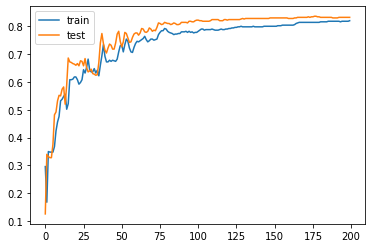

In [18]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Convergence of training and testing is happening after 100 epochs

Mini Batch Gradinet Descent

Train: 0.824, Test: 0.818


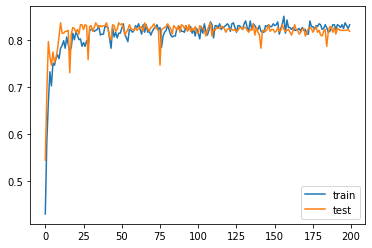

In [20]:
# define model
model_mini = Sequential()
model_mini.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model_mini.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model_mini.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history_mini = model_mini.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0, batch_size=32)
# evaluate the model
_, train_acc = model_mini.evaluate(trainX, trainy, verbose=0)
_, test_acc = model_mini.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history_mini.history['accuracy'], label='train')
pyplot.plot(history_mini.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Faster than Batch Gradient Descent and needs less number of epoches for convergence

Learning Rate Decay

In [22]:
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

In [23]:
 
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, decay):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, decay=decay)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('decay='+str(decay), pad=-80)
 

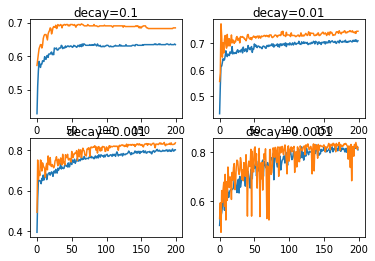

In [24]:
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
for i in range(len(decay_rates)):
	# determine the plot number
	plot_no = 220 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a decay rate
	fit_model(trainX, trainy, testX, testy, decay_rates[i])
# show learning curves
pyplot.show()

We can see that the large decay values of 1E-1 and 1E-2 indeed decay the learning rate too rapidly for this model on this problem and result in poor performance. The smaller decay values do result in better performance, with the value of 1E-4 perhaps causing in a similar result as not using decay at all. In fact, we can calculate the final learning rate with a decay of 1E-4 to be about 0.0075, only a little bit smaller than the initial value of 0.01.